# 1. 앙상블 개요

### < 앙상블 학습을 통한 분류>
- **여러개의 분류기**를 생성하고, 그 예측을 **결합**하여 정확한 최종 예측을 기대하는 기법
- 현재 정형데이터를 대상으로 하는 분류기에서는 앙상블 기법이 뛰어난 성과를 보여주고 있다.

### < 앙상블 학습의 목표 >
- 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 **신뢰성이 높은 예측값**을 얻는 것


### < 앙상블 기법의 종류>
#### 1. voting 
- 전체 데이터를 Logistic Regression, Decision Tree, K Nearest Neighbor 등 다양한 알고리즘을 돌려 최종결정.
            
            
#### 2. bagging
- 전체 데이터를 **중복을 허용해** 샘플링하여 각각의 데이터에 같은 알고리즘(Decision Tree)을 적용해 최종결정.
- 각각의 분류기에 데이터를 각각 샘플링해서 추출하는 방식을 **부트스트래핑(bootstrapping)분할 방식** 이라고 한다.
- (하나의 알고리즘이 전체 데이터를 감당하는게 아님!)

#### Random Forest
- Decision Tree를 여러개 사용해 투표하는 방식
- 같은 알고리즘으로 구현하는 배깅(Baggind)의 대표적인 방법
- 앙상블 방법 중 비교적 속도가 빠르며, 다양한 영역에서 높은 성능을 보인다.
- 부트스트래핑은 여러개의 작은 데이터셋을 중복을 허용해 만든다.
- 랜덤 포레스트는 결정나무를 기본으로 한다.
- 부트스트래핑으로 샘플링된 데이터마다 결정나무가 예측한 결과를 소프트보팅으로 최종 예측 결론을 얻는다.


#### 최종결정 방식
1. 하드보팅(Hard Voting): 다수결의 원칙과 비슷
2. 소프트 보팅(Soft Voting) : 확률의 평균을 취함



---
# 2. HAR ( Human Activity Recognition)
- IMU 센서를 활용해 사람의 행동을 인식하는 실험
- [관련 유툽 영상](https://www.youtube.com/watch?v=XOEN9W05_4A)

#### <데이터 소개>
1. 스마트폴은 장착한 사람의 행동을 관찰한 데이터 
    - 실험대상: 19-48세, 30명의 자원봉사자
2. 허리에 스마트폰을 착용해 50Hz의 주파수로 데이터를 얻음
    - 6가지 활동(걷기, 계단오르기, 계단내려가기, 앉기, 서있기, 눕기)을 수행
    - 내장된 가속도계와 자이로스코프를 사용해 일정한 속도로 3축 선형 가속 및 3축 각속도를 캡쳐
3. 실험은 데이터를 수동으로 라벨링하기 위해 비디오로 기록함
    - 획득한 데이터는 무작위로 2 세트로 분할됨(7:3)
4. 중력 및 신체 운동성분을 갖는 센서 가속 신호는 버터워스 저역 통과 필터를 사용해 신체 가속 및 중력으로 분리함
    - 중력은 저주파 성분만 갖는 것으로 가정하고 0.3Hz 차단 주파수를 가진 필터 사용

## (1) 데이터 읽기

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt"
feature_name_df = pd.read_csv(url, sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


- 특성 종류만 읽어온 것...

In [5]:
feature_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   column_index  561 non-null    int64 
 1   column_name   561 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


- 특성만 561개

In [4]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

### X 데이터 가져오기

In [6]:
X_train_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt"
X_test_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt"

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


- 엄청난 대용량...

In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


In [9]:
# 컬럼 이름 설정

X_train.columns = feature_name
X_test.columns = feature_name
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


### y데이터 가져오기

In [10]:
y_train_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt"
y_test_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt"

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

### 각 액션 별 데이터 수

In [14]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

<액션 분류>
1. 걷기
2. 계단 오르기
3. 계단 내려오기
4. 앉기
5. 일어나기
6. 눕기

- 5, 6 번 액션이 많고 3번 액션이 적지만, 차이가 심하지 않기때문에 그냥 진행

## (2) Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.8096369189005769

### max_depth를 다양하게 하기 위해 GridSearchCV 이용
- train 데이터에 대한 성능 확인..!

In [17]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24]}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

- cv=5 : 데이터를 5개로 나눠서 4개로 학습하고 1개로 검증
- return_train_score=True : train 데이터에 대한 score도 반환해라. (원래는 반환하지 않음)

In [20]:
grid_cv.best_score_, grid_cv.best_params_

(0.8543335321892183, {'max_depth': 8})

In [21]:
# 표로 성능을 정리

cv_res_df = pd.DataFrame(grid_cv.cv_results_)
cv_res_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


- max_depth = 8 일때, train과 test의 score 차이가 있다. 과적합일까>>>>>?
- mean_test_score 는 train 데이터의 validation score임을 잊지 말자!

### test 데이터에 대한 max_depth 변화에 따른 성능 확인


##### (1) for 문 사용

In [23]:
max_depth = [6, 8, 10, 12, 16, 20, 24]

for d in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=d, random_state=13)
    dt_clf.fit(X_train, y_train)
    
    pred = dt_clf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print('Max_Depth : ', d, " , ACC : ", acc)

Max_Depth :  6  , ACC :  0.8554462164913471
Max_Depth :  8  , ACC :  0.8734306073973532
Max_Depth :  10  , ACC :  0.8615541228367831
Max_Depth :  12  , ACC :  0.8595181540549711
Max_Depth :  16  , ACC :  0.8669833729216152
Max_Depth :  20  , ACC :  0.8652867322701052
Max_Depth :  24  , ACC :  0.8652867322701052


- 실제 test 데이터에서도 max_depth = 8 이 가장 좋다.

###### (2) GridSearchCV의 결과 사용

In [27]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=8, random_state=13)

In [26]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.8734306073973532

## (3) Random Forest

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'max_depth' : [6, 8, 10],
         'n_estimators' : [50, 100, 200],   # 나무 몇그루 사용할 것인지
         'min_samples_leaf' : [8, 12],      # 잎에 할당되는 최소 데이터 수 / max_depth에 도달하지 않았어도 
         'min_samples_split' : [8, 12]}     # 분할할때 남는 데이터를 최소 몇개로 설정할 것인지

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)    # n_jobs : cpu 코어를 몇새 사용할 것인가(-1: 다 사용)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

- min_samples_leaf, min_samples_split 는 큰 영향을 미치진 않는다.

In [29]:
# 결과 정리

cv_res_df = pd.DataFrame(grid_cv.cv_results_)
cv_res_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [30]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_res_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10


- 나무 개수가 많다고 좋은것은 아니군!

In [31]:
grid_cv.best_params_, grid_cv.best_score_

({'max_depth': 10,
  'min_samples_leaf': 8,
  'min_samples_split': 8,
  'n_estimators': 100},
 0.9151251360174102)

In [32]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=13)

In [33]:
# test 데이터에 적용

best_rf_clf = grid_cv.best_estimator_
best_rf_clf.fit(X_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_11688\33470397.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8,
                       n_jobs=-1, random_state=13)

In [34]:
pred_rf = best_rf_clf.predict(X_test)

accuracy_score(y_test, pred_rf)

0.9205972175093315

- Decision Tree 에 비해 엄청 좋음

## (4) 중요 특성 확인

In [36]:
best_cols_vals = best_rf_clf.feature_importances_
best_cols_vals

array([9.63570543e-05, 2.16715797e-04, 5.81975113e-05, 7.84266934e-03,
       2.51857403e-04, 3.07774386e-04, 4.79591810e-03, 4.09964695e-04,
       2.64005967e-04, 1.19698243e-02, 3.94764000e-05, 2.67806154e-04,
       2.07328000e-04, 9.88123061e-05, 1.40002321e-04, 9.16704113e-04,
       2.73999937e-03, 2.82976871e-04, 7.27134961e-04, 1.76970389e-03,
       3.45707764e-04, 1.36433644e-04, 1.23752152e-03, 1.57683401e-04,
       1.08862142e-04, 3.21316110e-04, 4.56947758e-05, 4.78143898e-05,
       7.90350892e-05, 5.10934027e-05, 5.07171302e-05, 7.02169848e-05,
       4.43780078e-05, 1.66771180e-04, 2.66769490e-05, 9.75250912e-06,
       1.04785140e-04, 4.25392011e-03, 7.78965780e-04, 5.38515789e-03,
       2.95128998e-02, 2.60520310e-02, 1.56883317e-02, 1.60383984e-03,
       6.74589552e-04, 5.46801242e-04, 1.67349902e-03, 5.74077616e-04,
       2.40162269e-04, 2.76616100e-02, 3.25178134e-02, 3.96718070e-03,
       2.77748342e-02, 2.30372983e-02, 8.84155484e-03, 4.06675092e-03,
      

In [37]:
best_cols = pd.Series(best_cols_vals, index=X_train.columns)
best_cols

tBodyAcc-mean()-X                       0.000096
tBodyAcc-mean()-Y                       0.000217
tBodyAcc-mean()-Z                       0.000058
tBodyAcc-std()-X                        0.007843
tBodyAcc-std()-Y                        0.000252
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.000203
angle(tBodyGyroJerkMean,gravityMean)    0.000270
angle(X,gravityMean)                    0.034638
angle(Y,gravityMean)                    0.026553
angle(Z,gravityMean)                    0.012837
Length: 561, dtype: float64

In [38]:
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

angle(X,gravityMean)               0.034638
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026553
tGravityAcc-mean()-Y               0.026052
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012837
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011257
fBodyAccJerk-max()-X               0.011040
dtype: float64

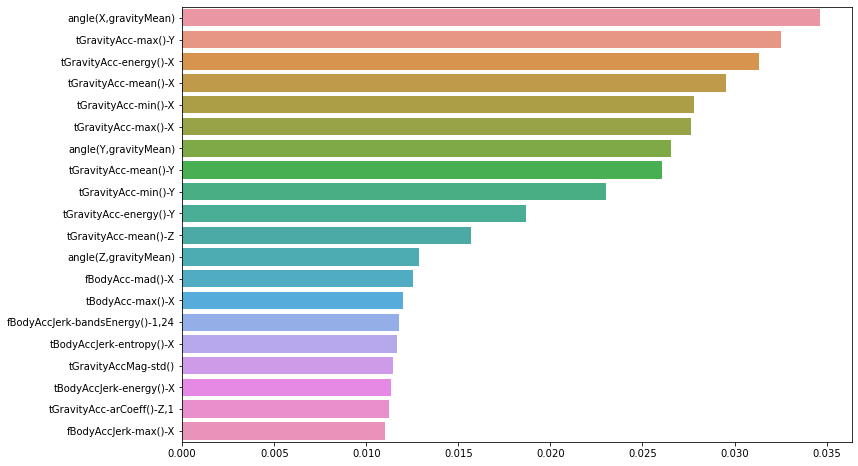

In [42]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show();

### 20개 특성만 가지고 다시 성능 확인
- 특성을 516개에서 20개로 줄이면 비록 acc는 낮더라도, 연산속도가 빨라질 것이다.

In [43]:
X_train_re = X_train[top20_cols.index]
X_test_re = X_train[top20_cols.index]

In [46]:
best_rf_clf_re = grid_cv.best_estimator_
best_rf_clf_re.fit(X_train_re, y_train.values.reshape(-1,))

pred_re = best_rf_clf_re.predict(X_test_re)
accuracy_score(y_test, pred_re)

ValueError: Found input variables with inconsistent numbers of samples: [2947, 7352]

- 강의에서는 결과로 0.82 가 나옴
- 만족할지 말지는 모르겠지만, 이런 경우도 있다고 제시할수 있어야 한다.